In [1]:
#Raw Data Training and Testing , See their accuracy and Feature Importance
#Random Forest Classifier
#Random Forest Regressor
#Logistic Regression 

In [2]:
#Random Forest feature importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import pandas as pd 


df = pd.read_csv('201029COVID19MEXICO.csv',encoding='latin1')
df.head(4)

#Y = distinctDF.filter(['SEX','AGE','NEUMONIA', 'PREGNANT','DIABETES', 'EPOC', 'ASTHMA', 'INMUSUPR','HYPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CRONIC','TOBACCO'])
#Y = distinctDF.selectExpr('SEX','AGE','NEUMONIA', 'PREGNANT','DIABETES', 'EPOC', 'ASTHMA', 'INMUSUPR',
                          #'HYPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','RENAL_CRONIC','TOBACCO')
#Y = df.iloc[:, -1].values
#print(Y)

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,29/10/20,0a9217,1,4,9,2,9,9,5,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
1,29/10/20,1aa972,2,12,9,2,9,9,17,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,29/10/20,00f853,2,12,9,2,9,9,17,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
3,29/10/20,1315ae,2,12,11,1,11,11,27,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97


In [3]:
#patient type is #9
Y = df.iloc[:,9]
print(Y)

X = df[['SEXO', 'Age','NEUMONIA','Pregnant','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','OTRA_COM','TABAQUISMO']]
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)



0          2
1          1
2          1
3          1
4          1
          ..
1048570    1
1048571    2
1048572    1
1048573    1
1048574    1
Name: TIPO_PACIENTE, Length: 1048575, dtype: int64
         SEXO  Age  NEUMONIA  Pregnant  DIABETES  EPOC  ASMA  INMUSUPR  \
0           2   94         2        97         2     2     2         2   
1           2   66         2        97         1     2     2         2   
2           2   29         2        97         2     2     2         2   
3           1   56         2         2         2     2     2         2   
4           1   55         2         2         1     2     2         2   
...       ...  ...       ...       ...       ...   ...   ...       ...   
1048570     2   21         2        97         2     2     2         2   
1048571     1   72         2         2         2     1     2         2   
1048572     1   28         2         1         2     2     2         2   
1048573     2   21         2        97         2     2     2      

In [4]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [5]:
accuracy = rf.score(X_train,y_train)
print( 'Random Forest Regression Accuracy: ', accuracy*100,'%')

Random Forest Regression Accuracy:  53.22514554372155 %


In [6]:
import numpy as np 
import seaborn as sns

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

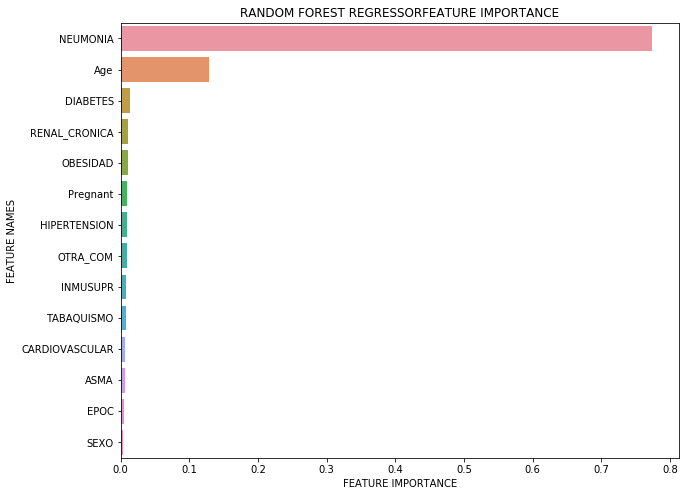

In [7]:
plot_feature_importance(rf.feature_importances_,X.columns,'RANDOM FOREST REGRESSOR')

In [8]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



# Make predictions for the test set
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8910331726074219

In [9]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.91      0.96      0.93    207150
           2       0.81      0.63      0.71     54994

    accuracy                           0.89    262144
   macro avg       0.86      0.80      0.82    262144
weighted avg       0.89      0.89      0.89    262144



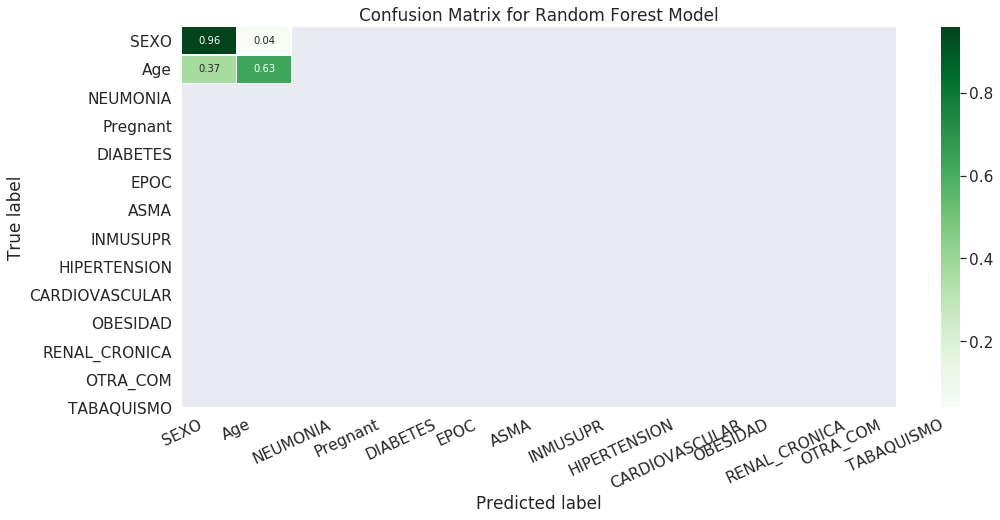

In [10]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['SEXO', 'Age','NEUMONIA','Pregnant','DIABETES','EPOC','ASMA','INMUSUPR','HIPERTENSION','CARDIOVASCULAR','OBESIDAD','RENAL_CRONICA','OTRA_COM','TABAQUISMO']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

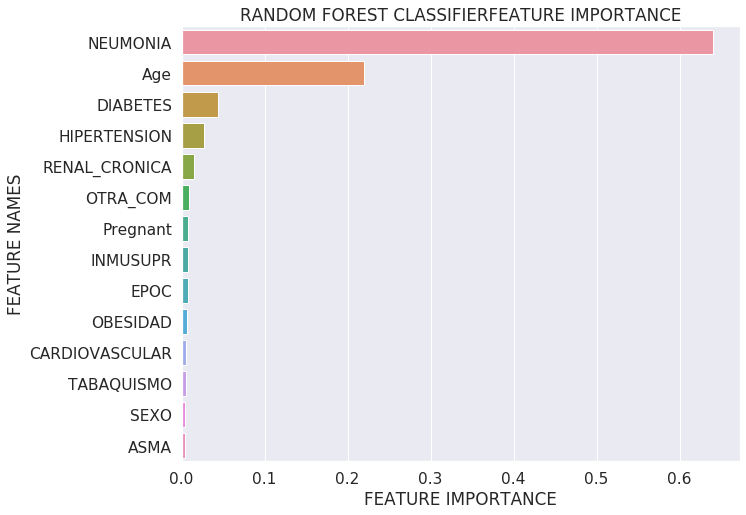

In [11]:
plot_feature_importance(forest.feature_importances_,X.columns,'RANDOM FOREST CLASSIFIER')